In [67]:
import requests, json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Activity by day

In [39]:
# define query
query = """query {
    uniswapDayDatas(first : 1000, orderBy: date, orderDirection: desc) {
        id
        date
        txCount
        dailyVolumeUSD
        dailyVolumeETH
        maxStored
    }
}"""

res = requests.post(subgraph_url, json={'query': query}).json()

day_datas = res['data']['uniswapDayDatas']

In [45]:
def create_plot(field, title):
    
    x = [datetime.fromtimestamp(row['date']) for row in day_datas]
    y = [float(row[field]) for row in day_datas]

    plt.plot(x,y)
    plt.title(title)
    plt.gcf().autofmt_xdate()
    plt.show()

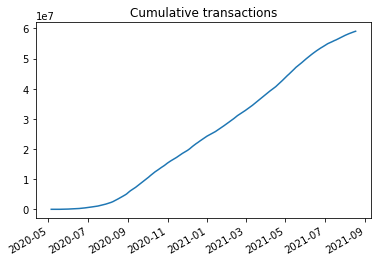

In [49]:
create_plot('txCount', 'Cumulative transactions')

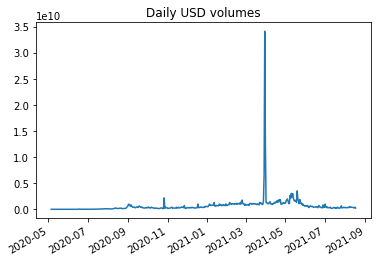

In [46]:
create_plot('dailyVolumeUSD', 'Daily USD volumes')

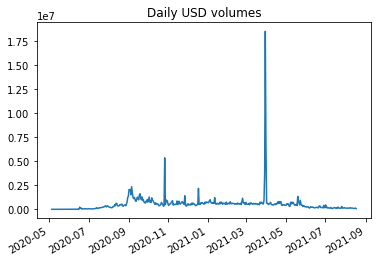

In [48]:
create_plot('dailyVolumeETH', 'Daily USD volumes')

# Tokens and pairs

In [84]:
# define query
query = """query {
    tokens (first:20, orderBy:tradeVolumeUSD, orderDirection:desc){
        id
        name
        tradeVolumeUSD
        txCount
    }
}"""

res = requests.post(subgraph_url, json={'query': query}).json()
tokens = res['data']['tokens']

# remove the delta financial
tokens = [row for row in tokens if 'delta.financial' not in row['name'].lower()]

# filter to top 10
tokens = tokens[:10]

print('Tokens by trading volume USD')
pd.DataFrame(tokens)

Tokens by trading volume USD


,id,name,tradeVolumeUSD,txCount
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,290080590103.6907081055280483882497,53449414
1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD//C,39971985446.79133868623001850469549,4750029
2,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,36020643816.54319722146379309977795,5445138
3,0x6b175474e89094c44da98b954eedeac495271d0f,Dai Stablecoin,17165438710.41418800137852738000149,2180846
4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,Wrapped BTC,8611773562.098518172656937741947621,662261
5,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,SHIBA INU,7192807274.237871357313480975302621,1079737
6,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,Uniswap,6823709668.841941679469422242043493,763545
7,0x956f47f50a910163d8bf957cf5846d573e7f87ca,Fei USD,5775404396.310902519162428591628805,73048
8,0x1453dbb8a29551ade11d89825ca812e05317eaeb,Tendies Token,4075356759.958185754553540887325284,53863
9,0x514910771af9ca656af840dff83e8264ecf986ca,ChainLink Token,3513684002.684402621734986899724447,389513


In [82]:
# define query
query = """query {
    tokens (first:20, orderBy:txCount, orderDirection:desc){
        id
        name
        tradeVolumeUSD
        txCount
    }
}"""

res = requests.post(subgraph_url, json={'query': query}).json()
tokens = res['data']['tokens']

# remove the delta financial
tokens = [row for row in tokens if 'delta.financial' not in row['name'].lower()]

# filter to top 10
tokens = tokens[:10]

print('Tokens by transaction count')
pd.DataFrame(tokens)

Tokens by transaction count


,id,name,tradeVolumeUSD,txCount
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,290080508561.2571867601855508017558,53449380
1,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether USD,36020638478.6797563742814994029471,5445135
2,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USD//C,39971979367.73143547688698692121138,4750026
3,0x6b175474e89094c44da98b954eedeac495271d0f,Dai Stablecoin,17165436371.28882491889091505124159,2180845
4,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,SHIBA INU,7192807274.237871357313480975302621,1079737
5,0x1f9840a85d5af5bf1d1762f925bdaddc4201f984,Uniswap,6823709573.824675015782112817079649,763544
6,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,Wrapped BTC,8611773562.098518172656937741947621,662261
7,0xa2b4c0af19cc16a6cfacce81f192b024d625817d,Kishu Inu,1462540907.983240390564006519205296,432459
8,0xd46ba6d942050d489dbd938a2c909a5d5039a161,Ampleforth,2176898978.270550588712456509550012,402853
9,0x514910771af9ca656af840dff83e8264ecf986ca,ChainLink Token,3513684002.684402621734986899724447,389513


# Performance of wETH, USDT and USDC

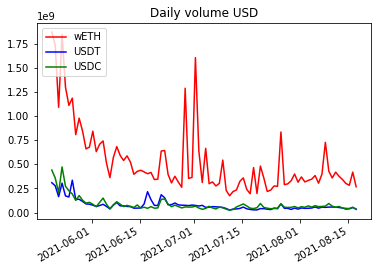

In [141]:
tokens = [
    {'name' : "wETH", 'id' : "0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"},
    {'name' : "USDT", 'id' : "0xdac17f958d2ee523a2206206994597c13d831ec7"},
    {'name' : "USDC", 'id' : "0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48"},
]

# init
data = {}

for token in tokens:

    # define query
    query = """query {
        tokenDayDatas(first:90, orderBy:date,orderDirection:desc, where: {token: """+ '"' +str(token['id']) + '"' +"""}){
            id
            date,
            dailyVolumeUSD
       }
    }"""
    
    res = requests.post(subgraph_url, json={'query': query}).json()
    token_day_datas = res['data']['tokenDayDatas']
    
    data[token['name']] = [(row['date'], row['dailyVolumeUSD']) for row in token_day_datas]

x = [datetime.fromtimestamp(row[0]) for row in data['wETH']]

y1 = [float(row[1]) for row in data['wETH']]
y2 = [float(row[1]) for row in data['USDT']]
y3 = [float(row[1]) for row in data['USDC']]

plt.clf()

plt.plot(x, y1, "-r", label="wETH")
plt.plot(x, y2, "-b", label="USDT")
plt.plot(x, y3, "-g", label="USDC")

plt.legend(loc="upper left")
plt.title('Daily volume USD')
plt.gcf().autofmt_xdate()
plt.show()